<h4>Image Recognition with Neural Network (logistic regression)</h4>

<p>using a dataset containing: 
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0) 
    - a test set of m_test images labeled as cat or non-cat 
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus,each image is square (height = num_px) and (width = num_px).

We will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.<p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import copy

In [2]:
"""Load Data"""

train_dataset = h5py.File("/home/sam/projects/deep-learning/data/train_cat.h5", "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File("/home/sam/projects/deep-learning/data/test_cat.h5", "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

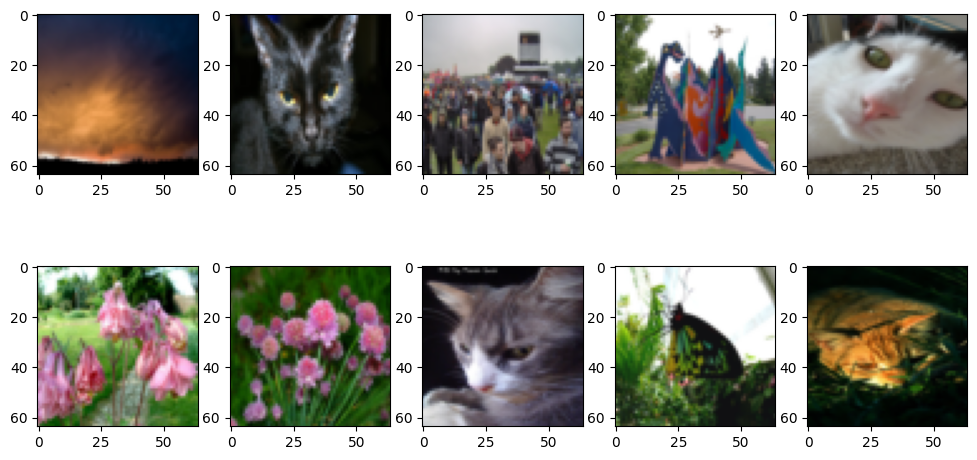

In [3]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 5, 1)
plt.imshow(train_set_x_orig[0])
plt.subplot(2, 5, 2)
plt.imshow(train_set_x_orig[25])
plt.subplot(2, 5, 3)
plt.imshow(train_set_x_orig[100])
plt.subplot(2, 5, 4)
plt.imshow(train_set_x_orig[201])
plt.subplot(2, 5, 5)
plt.imshow(train_set_x_orig[14])
plt.subplot(2, 5, 6)
plt.imshow(train_set_x_orig[43])
plt.subplot(2, 5, 7)
plt.imshow(train_set_x_orig[21])
plt.subplot(2, 5, 8)
plt.imshow(train_set_x_orig[71])
plt.subplot(2, 5, 9)
plt.imshow(train_set_x_orig[16])
plt.subplot(2, 5, 10)
plt.imshow(train_set_x_orig[41])

plt.show()

In [4]:
print(train_set_x_orig.shape)
print(train_set_y_orig.shape)
print(test_set_x_orig.shape)
print(test_set_y_orig.shape)
print(classes.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)
(2,)


In [5]:
"""
Reshape the training and test data sets 
so that images of size (num_px, num_px, 3) 
are flattened into single vectors of shape 
(num_px ∗ num_px ∗ 3, 1)
"""

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [6]:
"""
To represent color images, the red, green and blue channels (RGB) 
must be specified for each pixel, and so the pixel value is 
actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is 
to center and standardize your dataset, meaning that you 
substract the mean of the whole numpy array from each example, 
and then divide each example by the standard deviation of the 
whole numpy array. But for picture datasets, it is simpler and 
more convenient and works almost as well to just divide every row 
of the dataset by 255 (the maximum value of a pixel channel).
"""
X_train = train_set_x_flatten / 255
Y_train = train_set_y_orig
X_test = test_set_x_flatten / 255
Y_test = test_set_y_orig
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


<h4>Logistic Regression Model</h4>

In [7]:
def param_init(m):
   
    W = np.zeros((m, 1))
    b = 0.0
    return W, b

In [8]:
def sigmoid(Z):
   
    A = 1 / (1 + np.exp(-Z))
    
    return A

In [9]:
def compute_cost(Y, A):
    cost = - np.mean(Y * np.log(A) + ((1-Y) * np.log(1-A)))
    return cost

In [10]:
def forward_propagation(W, X, b):
    Z = np.dot(W.T, X) + b
    return Z

In [11]:
def propagate(W, b, X, Y):

    m = X.shape[1]
    Z = forward_propagation(W, X, b)
    A = sigmoid(Z)
    cost = compute_cost(Y, A)
    
    dA = A - Y
    dW = np.dot(X, dA.T) / m
    db = np.mean(dA)
    
    cost = np.squeeze(np.array(cost))

    grads = {"dW": dW,
             "db": db}
    
    return grads, cost

In [12]:
def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost, epsilon):

    W = copy.deepcopy(W)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(W, b, X, Y)
        
        dW = grads["dW"]
        db = grads["db"]
        
        W -= learning_rate * dW
        b -= learning_rate * db
        
        if i % epsilon == 0:
            costs.append(cost)

            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"W": W,
              "b": b}
    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

In [13]:
def predict(W, b, X):
   
    m = X.shape[1]
    
    Y_prediction = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(W.T, X) + b)

    Y_prediction = np.where(A > 0.5, 1, 0)
        
    return Y_prediction

In [14]:
def model(
    X_train, 
    Y_train, 
    X_test, 
    Y_test, 
    num_iterations=2000, 
    learning_rate=0.5,
    print_cost=False,
    epsilon=100
):
    
    m = X_train.shape[0]
    W, b =  param_init(m)
    params, grads, costs = optimize(
        W=W, 
        b=b, 
        X=X_train, 
        Y=Y_train, 
        num_iterations=num_iterations, 
        learning_rate=learning_rate, 
        print_cost=print_cost,
        epsilon=epsilon
    )
    
    W = params["W"]
    b = params["b"]
    Y_prediction_test = predict(W, b, X_test)
    Y_prediction_train = predict(W, b, X_train)
   
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [15]:
"""Train the model"""
model1 = model(
    X_train=X_train, 
    Y_train=Y_train, 
    X_test=X_test, 
    Y_test=Y_test, 
    num_iterations=2000, 
    learning_rate=0.005,
    print_cost=True,
    epsilon=100
)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


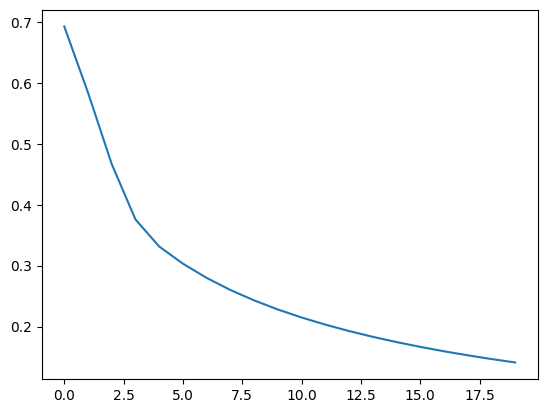

In [16]:
plt.plot(model1["costs"])
plt.show()

In [17]:
learning_rates = [0.01, 0.005, 0.001, 0.0001]
models = {}
for alpha in learning_rates:
    print("____________________________________________________________")
    print(f" Learning Rate : {alpha}")
    print("____________________________________________________________")
    model_result = model(
        X_train=X_train, 
        Y_train=Y_train, 
        X_test=X_test, 
        Y_test=Y_test, 
        num_iterations=2000, 
        learning_rate=alpha,
        print_cost=True,
        epsilon=100
    )
    models[alpha] = model_result


____________________________________________________________
 Learning Rate : 0.01
____________________________________________________________
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.823921
Cost after iteration 200: 0.418945
Cost after iteration 300: 0.617350
Cost after iteration 400: 0.522116
Cost after iteration 500: 0.387709
Cost after iteration 600: 0.236254
Cost after iteration 700: 0.154222
Cost after iteration 800: 0.135328
Cost after iteration 900: 0.124971
Cost after iteration 1000: 0.116478
Cost after iteration 1100: 0.109193
Cost after iteration 1200: 0.102804
Cost after iteration 1300: 0.097130
Cost after iteration 1400: 0.092043
Cost after iteration 1500: 0.087453
Cost after iteration 1600: 0.083286
Cost after iteration 1700: 0.079487
Cost after iteration 1800: 0.076007
Cost after iteration 1900: 0.072809
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %
____________________________________________________________
 Learning Rate : 0.005
______

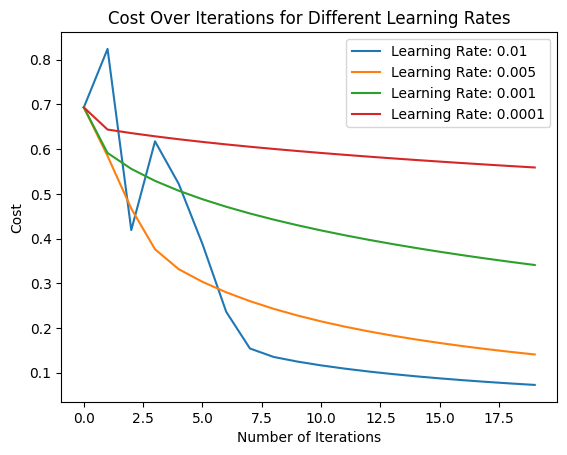

In [23]:
for alpha in learning_rates:
    plt.plot(models[alpha]["costs"], label=f"Learning Rate: {alpha}")
plt.legend()
plt.title("Cost Over Iterations for Different Learning Rates")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()